# Module 3- Regression & Beta Calculation




Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
dataset = pd.read_csv('GOLD.csv')
data = dataset.dropna()

In [7]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 7].values


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 50)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

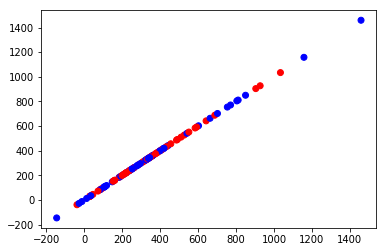

In [11]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred,c=['b','r'])

In [12]:
dataset['Pred'] = regressor.predict(dataset.iloc[:, 1:5].values)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


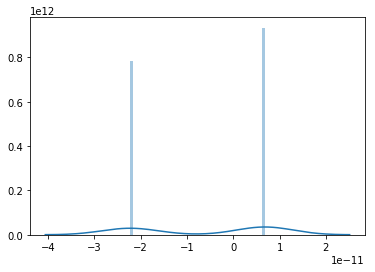

In [13]:
sns.distplot(y_test-y_pred,bins =50)


In [14]:
X = data.iloc[:, 1:5].values
y1 = data.iloc[:, 7].values

import statsmodels.api as sm
X1 = sm.add_constant(X)

In [15]:
a = sm.OLS(y1,X1)
res = a.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.001e+28
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:45:37   Log-Likelihood:                 9841.7
No. Observations:                 411   AIC:                        -1.967e+04
Df Residuals:                     406   BIC:                        -1.965e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.777e-12   1.44e-11      0.679      0.4

In [18]:
# Now new will be the polynomial as pred was linear
import statsmodels.api as sm
    X = dataset[['Price','Open','High', 'Low']]
    y = dataset['new']


In [20]:
X1 = sm.add_constant(X)
b = sm.OLS(y,X1)
res = b.fit()
print (res.summary())


                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.118e+07
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:53:42   Log-Likelihood:                -538.12
No. Observations:                 512   AIC:                             1086.
Df Residuals:                     507   BIC:                             1107.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3282      0.738      0.445      0.6

In [22]:
X = dataset[['Price','Open','High', 'Low']]
y = dataset['new']


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 50)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred = regressor.predict(X_test)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


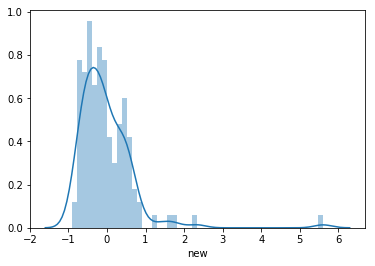

In [28]:
sns.distplot(y_test-y_pred,bins =50)


In [29]:
# Above graph tells us that it has a polynomial relationship
# Query 2 Finding beta value
pvr = pd.read_csv('PVR.csv')
pvr = pvr[pvr.Series == 'EQ']
pvr.index = pvr.Date
nfy = pd.read_csv('Nifty50.csv')
nfy.index = nfy.Date
datas = pd.DataFrame([pvr['Close Price'], nfy['Close']]).transpose()
datas.columns = ['PVR_CP','Nifty_CP']

print (datas.head())

              PVR_CP  Nifty_CP
Date                          
15-May-2017  1524.95   9445.40
16-May-2017  1539.00   9512.25
17-May-2017  1530.30   9525.75
18-May-2017  1515.05   9429.45
19-May-2017  1513.55   9427.90


In [30]:
ret = datas.pct_change()
ret = ret.dropna()
ret.head()

,PVR_CP,Nifty_CP
Date,,
16-May-2017,0.009213,0.007078
17-May-2017,-0.005653,0.001419
18-May-2017,-0.009965,-0.010109
19-May-2017,-0.000990,-0.000164
22-May-2017,-0.021506,0.001098


In [31]:
ret = ret.iloc[-60:,:]
ret

,PVR_CP,Nifty_CP
Date,,
11-Feb-2019,-0.010032,-0.005007
12-Feb-2019,-0.026790,-0.005271
13-Feb-2019,0.014606,-0.003485
14-Feb-2019,0.009044,-0.004410
15-Feb-2019,0.003021,-0.002015
18-Feb-2019,-0.033869,-0.007781
19-Feb-2019,0.032804,-0.003440
20-Feb-2019,-0.012242,0.012363
21-Feb-2019,0.006621,0.005067


In [34]:
# Calculating beta value for the past 3 months for the stock 'PVR' comparing with index 'Nifty' 
x = ret['Nifty_CP']
y = ret['PVR_CP']

x1 = sm.add_constant(x)
mdl = sm.OLS(y,x1)
res = mdl.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                 PVR_CP   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     6.196
Date:                Thu, 11 Jul 2019   Prob (F-statistic):             0.0157
Time:                        12:10:41   Log-Likelihood:                 163.41
No. Observations:                  60   AIC:                            -322.8
Df Residuals:                      58   BIC:                            -318.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.002      1.003      0.3

In [37]:
# Therefore the beta value is .7656 for pvr wrt nifty
# Calculating beta value montly
datas['Month'] = datas.index.str.slice(3)


In [43]:
month = np.zeros((25,2), dtype =float)
for i,j in enumerate (datas.Month.unique()):
    temp = datas[datas.Month==j]
    month[i]=temp.iloc[-1,0:2]
    
month = pd.DataFrame(month)

In [44]:
month.columns = ['PVR','NIFTY']
month.index = datas['Month'].unique()
month

,PVR,NIFTY
May-2017,1454.95,9621.25
Jun-2017,1408.55,9520.90
Jul-2017,1340.55,10077.10
Aug-2017,1321.45,9917.90
Sep-2017,1204.90,9788.60
Oct-2017,1387.15,10335.30
Nov-2017,1315.95,10226.55
Dec-2017,1411.05,10530.70
Jan-2018,1460.60,11027.70
Feb-2018,1320.45,10492.85


In [45]:
retm = month.pct_change()
retm = retm.dropna()
retm.head()


,PVR,NIFTY
Jun-2017,-0.031891,-0.010430
Jul-2017,-0.048277,0.058419
Aug-2017,-0.014248,-0.015798
Sep-2017,-0.088199,-0.013037
Oct-2017,0.151257,0.055851


In [46]:
xm = retm['NIFTY']
ym = retm['PVR']

x1 = sm.add_constant(xm)
mdl = sm.OLS(ym,x1)
res = mdl.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PVR   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3.436
Date:                Thu, 11 Jul 2019   Prob (F-statistic):             0.0772
Time:                        12:25:44   Log-Likelihood:                 21.709
No. Observations:                  24   AIC:                            -39.42
Df Residuals:                      22   BIC:                            -37.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.021      0.274      0.7

In [ ]:
# Therefore the monthly beta value is .9661 for pvr wrt nifty
# Here both the values come out to be less than 1 but not negative. This tells us that when nifty gains 100 points pvr will gain 
# upto 96 points. If the beta value is negative this tells that there is an inverse relationship with the market. When nifty comes 
# down some stocks tend to go up. Therefore these stocks have a negative beta coefficient. 